# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

---
# Ejercicio 🌮🥤

## 📍 Objetivo
Resolver la prueba técnica para el puesto de Data Analyst de la startup [ifood](https://www.ifood.com.br/) de Brasil.
<br>Esta startup se dedica al servicio de delivery de comida similar a Pedidos Ya, Rappi y Uber Eats.

## 📍 Contexto

### La empresa

Considere una empresa bien establecida que opera en el sector minorista de alimentos. Actualmente tienen alrededor
varios cientos de miles de clientes registrados y sirven a casi un millón de consumidores al año.
Venden productos de 5 categorías principales: vinos, productos cárnicos raros, frutas exóticas, especialmente
Pescados preparados y productos dulces. Estos se pueden dividir en productos premium y productos regulares. 

Los clientes pueden ordenar y adquirir productos a través de 3 canales de venta: tiendas físicas, catálogos y
el sitio web de la empresa. A nivel mundial, la compañía tuvo ingresos sólidos y un resultado final saludable en el
últimos 3 años, pero las perspectivas de crecimiento de ganancias para los próximos 3 años no son prometedoras ... 

**Por esta razón, se están considerando varias iniciativas estratégicas para revertir esta situación. Una es mejorar la realización de actividades de marketing, con un enfoque especial en las campañas de marketing.**


### El Departamento de Marketing

El departamento de marketing fue presionado para gastar su presupuesto anual de manera más inteligente. La CMO
percibe la importancia de tener un enfoque más cuantitativo a la hora de tomar decisiones, por lo que **se contrató a un pequeño equipo de científicos de datos con un objetivo claro en mente: construir una solución que apoye las iniciativas de marketing directo.**
<br>Deseablemente, el éxito de estas actividades demostrará el área de oportunidad y también deberan convencer a los más escépticos dentro de la empresa.


### El objetivo del equipo 

Es construir un análisis para abordar el mayor beneficio para la próxima campaña de marketing, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender a una nueva base de datos de clientes. 

**Para construir el análisis, se desarrollo una campaña piloto que involucró 2.240 clientes. Los clientes fueron seleccionados al azar y contactados por teléfono con respecto a la adquisición del gadget. Durante los meses siguientes, los clientes que compraron el oferta fueron debidamente etiquetados.**

El coste total de la campaña de muestra fue de 6.720MU y los ingresos generado por los clientes que aceptaron la oferta fue de 3.674MU. A nivel mundial, la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%.


## 📍 Consideraciones

- Repliquen este notebook para la resolución del ejercicio.
- Consideren las etapas: 1) Cargamos los datos, 2) Preparación de la data, 3) Clasificación, 4) Regresión y 5) Guardar un modelo.

**Son libres de decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.


## 📍 Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`. 
- Guarden el modelo de clasificación Randon forest como `rf.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

---

# Classification Model

In [83]:
import numpy as np
import pandas as pd

import funpymodeling

from pprint import pprint

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
df_data = pd.read_csv("data/new_marketing_campaign.csv", sep=',')

In [4]:
print(df_data.columns)
print(df_data.shape)

Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'AcceptedAnyCmp', 'HasChildren', 'Age', 'ClientDays', 'AmountSpend',
       'NumPurchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Generation_BabyBoomer', 'Generation_Millennials',
       'Generation_Postguerra', 'Generation_X', 'Generation_Z',
       'NewMaritalStatus_Couple', 'NewMaritalStatus_Divorced',
       'NewMaritalStatus_Other', 'NewMaritalStatus_Single',
       'NewMaritalStatus_Widow'],
      dtype='object')
(2198, 26)


In [5]:
df_data

,Income,Recency,NumWebVisitsMonth,Complain,Response,AcceptedAnyCmp,HasChildren,Age,ClientDays,AmountSpend,NumPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Generation_BabyBoomer,Generation_Millennials,Generation_Postguerra,Generation_X,Generation_Z,NewMaritalStatus_Couple,NewMaritalStatus_Divorced,NewMaritalStatus_Other,NewMaritalStatus_Single,NewMaritalStatus_Widow
0,58138.0,58,7,0,1,0,0,66,3885,1617,25,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,46344.0,38,5,0,0,0,1,69,3335,27,6,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,71613.0,26,4,0,0,0,0,58,3534,776,21,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,26646.0,26,6,0,0,0,1,39,3361,53,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,58293.0,94,5,0,0,0,1,42,3383,422,19,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,61223.0,46,5,0,0,0,1,56,3603,1341,18,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2194,64014.0,56,7,0,0,1,1,77,3241,444,22,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2195,56981.0,91,6,0,0,1,0,42,3377,1241,19,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2196,69245.0,8,3,0,0,0,1,67,3378,843,23,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


Discritezamos la variable `Income`.

In [6]:
income_cat = pd.qcut(df_data['Income'], q=10)

In [7]:
income_cat

0       (51301.0, 58359.6]
1       (44389.0, 51301.0]
2       (65194.0, 71682.6]
3       (24011.7, 31878.8]
4       (51301.0, 58359.6]
               ...        
2193    (58359.6, 65194.0]
2194    (58359.6, 65194.0]
2195    (51301.0, 58359.6]
2196    (65194.0, 71682.6]
2197    (51301.0, 58359.6]
Name: Income, Length: 2198, dtype: category
Categories (10, interval[float64, right]): [(1729.999, 24011.7] < (24011.7, 31878.8] < (31878.8, 38139.9] < (38139.9, 44389.0] ... (58359.6, 65194.0] < (65194.0, 71682.6] < (71682.6, 79772.7] < (79772.7, 666666.0]]

In [8]:
df_data['Income_Cat'] = pd.qcut(df_data['Income'], q=10)

Dropeamos la variable original.

In [9]:
labels = ['Income']
df_data = df_data.drop(labels=labels, axis=1)

In [10]:
df_data

,Recency,NumWebVisitsMonth,Complain,Response,AcceptedAnyCmp,HasChildren,Age,ClientDays,AmountSpend,NumPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Generation_BabyBoomer,Generation_Millennials,Generation_Postguerra,Generation_X,Generation_Z,NewMaritalStatus_Couple,NewMaritalStatus_Divorced,NewMaritalStatus_Other,NewMaritalStatus_Single,NewMaritalStatus_Widow,Income_Cat
0,58,7,0,1,0,0,66,3885,1617,25,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,"(51301.0, 58359.6]"
1,38,5,0,0,0,1,69,3335,27,6,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,"(44389.0, 51301.0]"
2,26,4,0,0,0,0,58,3534,776,21,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,"(65194.0, 71682.6]"
3,26,6,0,0,0,1,39,3361,53,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,"(24011.7, 31878.8]"
4,94,5,0,0,0,1,42,3383,422,19,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,"(51301.0, 58359.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,46,5,0,0,0,1,56,3603,1341,18,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,"(58359.6, 65194.0]"
2194,56,7,0,0,1,1,77,3241,444,22,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,"(58359.6, 65194.0]"
2195,91,6,0,0,1,0,42,3377,1241,19,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,"(51301.0, 58359.6]"
2196,8,3,0,0,0,1,67,3378,843,23,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,"(65194.0, 71682.6]"


Aplicamos 'one hot encoding' a la variables categorica `Income_Cat`.

In [12]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Recency,0,0.0,28,0.012739,100,int64
1,NumWebVisitsMonth,0,0.0,10,0.004550,16,int64
2,Complain,0,0.0,2179,0.991356,2,int64
3,Response,0,0.0,1868,0.849864,2,int64
4,AcceptedAnyCmp,0,0.0,1748,0.795268,2,int64
5,HasChildren,0,0.0,617,0.280710,2,int64
6,Age,0,0.0,0,0.000000,52,int64
7,ClientDays,0,0.0,0,0.000000,662,int64
8,AmountSpend,0,0.0,0,0.000000,1038,int64
9,NumPurchases,0,0.0,4,0.001820,39,int64


In [13]:
df_data = pd.get_dummies(df_data)

In [14]:
df_data

,Recency,NumWebVisitsMonth,Complain,Response,AcceptedAnyCmp,HasChildren,Age,ClientDays,AmountSpend,NumPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Generation_BabyBoomer,Generation_Millennials,Generation_Postguerra,Generation_X,Generation_Z,NewMaritalStatus_Couple,NewMaritalStatus_Divorced,NewMaritalStatus_Other,NewMaritalStatus_Single,NewMaritalStatus_Widow,"Income_Cat_(1729.999, 24011.7]","Income_Cat_(24011.7, 31878.8]","Income_Cat_(31878.8, 38139.9]","Income_Cat_(38139.9, 44389.0]","Income_Cat_(44389.0, 51301.0]","Income_Cat_(51301.0, 58359.6]","Income_Cat_(58359.6, 65194.0]","Income_Cat_(65194.0, 71682.6]","Income_Cat_(71682.6, 79772.7]","Income_Cat_(79772.7, 666666.0]"
0,58,7,0,1,0,0,66,3885,1617,25,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,38,5,0,0,0,1,69,3335,27,6,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,26,4,0,0,0,0,58,3534,776,21,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,26,6,0,0,0,1,39,3361,53,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,94,5,0,0,0,1,42,3383,422,19,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,46,5,0,0,0,1,56,3603,1341,18,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2194,56,7,0,0,1,1,77,3241,444,22,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2195,91,6,0,0,1,0,42,3377,1241,19,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2196,8,3,0,0,0,1,67,3378,843,23,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Recency,0,0.0,28,0.012739,100,int64
1,NumWebVisitsMonth,0,0.0,10,0.004550,16,int64
2,Complain,0,0.0,2179,0.991356,2,int64
3,Response,0,0.0,1868,0.849864,2,int64
4,AcceptedAnyCmp,0,0.0,1748,0.795268,2,int64
5,HasChildren,0,0.0,617,0.280710,2,int64
6,Age,0,0.0,0,0.000000,52,int64
7,ClientDays,0,0.0,0,0.000000,662,int64
8,AmountSpend,0,0.0,0,0.000000,1038,int64
9,NumPurchases,0,0.0,4,0.001820,39,int64


Preparamos los datos que seran usados para el entrenamiento.

In [16]:
data_x = df_data.drop('Response', axis=1)
data_y = df_data['Response']

In [17]:
data_x = data_x.values
data_y = data_y.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Spliteamos el dataset
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.3,
)

Creación del modelo de clasificacion `RandomForestClassifier`

In [20]:
from sklearn.ensemble import RandomForestClassifier 

In [21]:
# Creamos 1000 decision trees
rf_model = RandomForestClassifier(n_estimators=1000, random_state=99)

In [22]:
%%time

rf_model.fit(x_train, y_train)

CPU times: user 1.22 s, sys: 15.2 ms, total: 1.23 s
Wall time: 1.24 s


RandomForestClassifier(n_estimators=1000, random_state=99)

In [25]:
# En training (por defecto asume 0.5 como punto de corte)
pred_tr = rf_model.predict(x_train)

In [26]:
# En testing (por defecto asume 0.5 como punto de corte)
pred_ts = rf_model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
train_metrics_05 = {
    'accuracy': accuracy_score(y_train, pred_tr, normalize=True),
    'precision': precision_score(y_train, pred_tr),
    'recall': recall_score(y_train, pred_tr),
    'f1_score': f1_score(y_train, pred_tr),
}

pprint(train_metrics_05)

{'accuracy': 0.9934980494148244,
 'f1_score': 0.9786324786324785,
 'precision': 0.9913419913419913,
 'recall': 0.9662447257383966}


In [29]:
test_metrics_05 = {
    'accuracy': accuracy_score(y_test, pred_ts, normalize=True),
    'precision': precision_score(y_test, pred_ts),
    'recall': recall_score(y_test, pred_ts),
    'f1_score': f1_score(y_test, pred_ts),
}

pprint(test_metrics_05)

{'accuracy': 0.8712121212121212,
 'f1_score': 0.3795620437956204,
 'precision': 0.5909090909090909,
 'recall': 0.27956989247311825}


In [37]:
df_metrics_05 = pd.DataFrame([
    train_metrics_05,
    test_metrics_05,
], index=['train', 'test'])

display(df_metrics_05)

,accuracy,precision,recall,f1_score
train,0.993498,0.991342,0.966245,0.978632
test,0.871212,0.590909,0.279570,0.379562


In [39]:
df_metrics_05 = df_metrics_05.T
display(df_metrics_05)

,train,test
accuracy,0.993498,0.871212
precision,0.991342,0.590909
recall,0.966245,0.279570
f1_score,0.978632,0.379562


In [40]:
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

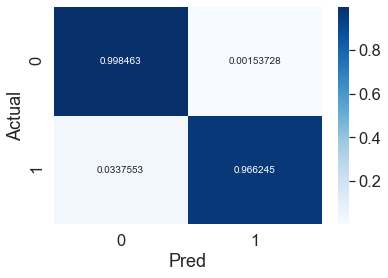

In [41]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat1 = pd.crosstab(
    index=y_train,    # filas    = valor real
    columns=pred_tr,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

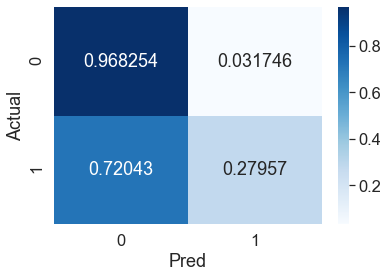

In [42]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat2 = pd.crosstab(
    index=y_test,     # filas    = valor real
    columns=pred_ts,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

In [45]:
# En training
pred_prob_tr = rf_model.predict_proba(x_train)

In [46]:
pred_prob_tr

array([[0.88966667, 0.11033333],
       [0.987     , 0.013     ],
       [0.996     , 0.004     ],
       ...,
       [0.94833333, 0.05166667],
       [0.96233333, 0.03766667],
       [0.3296    , 0.6704    ]])

In [47]:
pred_prob_tr = pred_prob_tr[:,1]

In [48]:
pred_prob_tr

array([0.11033333, 0.013     , 0.004     , ..., 0.05166667, 0.03766667,
       0.6704    ])

In [49]:
pred_prob_tr.mean()

0.1549927046566351

In [50]:
# En testing
pred_prob_ts = rf_model.predict_proba(x_test)

In [51]:
pred_prob_ts

array([[0.655     , 0.345     ],
       [0.93392143, 0.06607857],
       [0.994     , 0.006     ],
       ...,
       [0.92133333, 0.07866667],
       [0.983     , 0.017     ],
       [0.992     , 0.008     ]])

In [52]:
pred_prob_ts = pred_prob_ts[:,1]

In [53]:
pred_prob_ts

array([0.345     , 0.06607857, 0.006     , 0.0652    , 0.205     ,
       0.00233333, 0.015     , 0.35466667, 0.007     , 0.3660119 ,
       0.701     , 0.47288333, 0.656     , 0.044     , 0.53591667,
       0.316     , 0.2035    , 0.03166667, 0.235     , 0.58783333,
       0.76067857, 0.02166667, 0.151     , 0.029     , 0.019     ,
       0.01766667, 0.29631667, 0.17285   , 0.04715   , 0.695     ,
       0.00906667, 0.026     , 0.024     , 0.01991667, 0.39809524,
       0.04775   , 0.023     , 0.022     , 0.03066667, 0.38083333,
       0.212     , 0.451     , 0.1355    , 0.30036667, 0.03208333,
       0.022     , 0.3841    , 0.069     , 0.10301667, 0.001     ,
       0.14490556, 0.72361667, 0.07866667, 0.005     , 0.3842    ,
       0.161     , 0.24058333, 0.043     , 0.002     , 0.293     ,
       0.0115    , 0.397     , 0.0525    , 0.01066667, 0.11106667,
       0.072     , 0.0355    , 0.6938    , 0.081     , 0.24791667,
       0.43231667, 0.38316667, 0.04858333, 0.347     , 0.194  

In [54]:
pred_prob_ts.mean()

0.1443484114959115

Seteamos el nuevo punto de corte en 0.15

In [55]:
pred_tr_1 = np.where(pred_prob_tr > 0.15, 1, 0)

In [56]:
pred_ts_1 = np.where(pred_prob_ts > 0.15, 1, 0)

In [57]:
train_metrics_015 = {
    'accuracy': accuracy_score(y_train, pred_tr_1, normalize=True),
    'precision': precision_score(y_train, pred_tr_1),
    'recall': recall_score(y_train, pred_tr_1),
    'f1_score': f1_score(y_train, pred_tr_1),
}

pprint(train_metrics_015)

{'accuracy': 0.959037711313394,
 'f1_score': 0.8826815642458101,
 'precision': 0.79,
 'recall': 1.0}


In [58]:
test_metrics_015 = {
    'accuracy': accuracy_score(y_test, pred_ts_1, normalize=True),
    'precision': precision_score(y_test, pred_ts_1),
    'recall': recall_score(y_test, pred_ts_1),
    'f1_score': f1_score(y_test, pred_ts_1),
}

pprint(test_metrics_015)

{'accuracy': 0.7666666666666667,
 'f1_score': 0.4934210526315789,
 'precision': 0.35545023696682465,
 'recall': 0.8064516129032258}


In [59]:
df_metrics_015 = pd.DataFrame([
    train_metrics_015,
    test_metrics_015,
], index=['train', 'test'])

display(df_metrics_015)

,accuracy,precision,recall,f1_score
train,0.959038,0.79000,1.000000,0.882682
test,0.766667,0.35545,0.806452,0.493421


In [60]:
df_metrics_015 = df_metrics_015.T
display(df_metrics_015)

,train,test
accuracy,0.959038,0.766667
precision,0.790000,0.355450
recall,1.000000,0.806452
f1_score,0.882682,0.493421


<AxesSubplot:xlabel='Pred', ylabel='Actual'>

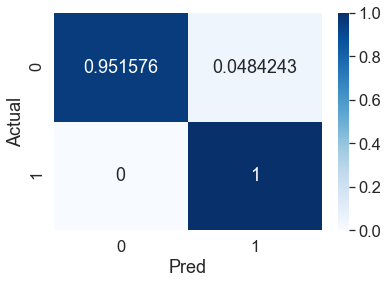

In [61]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat3 = pd.crosstab(
    index=y_train,      # filas    = valor real
    columns=pred_tr_1,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat3, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

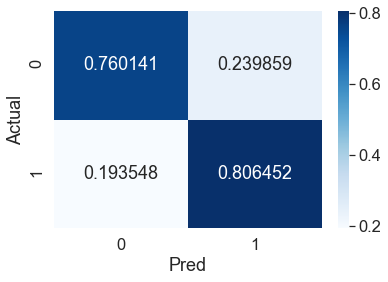

In [62]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat4 = pd.crosstab(
    index=y_test,       # filas    = valor real
    columns=pred_ts_1,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat4, annot=True, cmap='Blues', fmt='g')

Ahora busquemos el **Threshold** apartir de la libreria `yellowbrick`

In [63]:
!pip3 install yellowbrick

You should consider upgrading via the '/Users/maferreyra/.pyenv/versions/3.8.12/envs/dd/bin/python3.8 -m pip install --upgrade pip' command.


In [64]:
from yellowbrick.classifier import DiscriminationThreshold

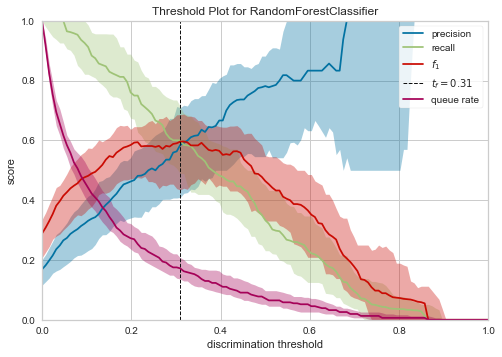

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [65]:
visualizer = DiscriminationThreshold(rf_model)

visualizer.fit(x_train, y_train) # Ajustar data al visualizador
visualizer.show()                # Mostrar figura

Seteamos el nuevo punto de corte en 0.31

In [66]:
pred_tr_2 = np.where(pred_prob_tr >= 0.31, 1, 0)

In [67]:
pred_ts_2 = np.where(pred_prob_ts >= 0.31, 1, 0)

In [68]:
train_metrics_031 = {
    'accuracy': accuracy_score(y_train, pred_tr_2, normalize=True),
    'precision': precision_score(y_train, pred_tr_2),
    'recall': recall_score(y_train, pred_tr_2),
    'f1_score': f1_score(y_train, pred_tr_2),
}

pprint(train_metrics_031)

{'accuracy': 0.9921976592977894,
 'f1_score': 0.9753086419753086,
 'precision': 0.9518072289156626,
 'recall': 1.0}


In [69]:
test_metrics_031 = {
    'accuracy': accuracy_score(y_test, pred_ts_2, normalize=True),
    'precision': precision_score(y_test, pred_ts_2),
    'recall': recall_score(y_test, pred_ts_2),
    'f1_score': f1_score(y_test, pred_ts_2),
}

pprint(test_metrics_031)

{'accuracy': 0.8469696969696969,
 'f1_score': 0.4924623115577889,
 'precision': 0.46226415094339623,
 'recall': 0.5268817204301075}


In [70]:
df_metrics_031 = pd.DataFrame([
    train_metrics_031,
    test_metrics_031,
], index=['train', 'test'])

display(df_metrics_031)

,accuracy,precision,recall,f1_score
train,0.992198,0.951807,1.000000,0.975309
test,0.846970,0.462264,0.526882,0.492462


In [71]:
df_metrics_031 = df_metrics_031.T
display(df_metrics_031)

,train,test
accuracy,0.992198,0.846970
precision,0.951807,0.462264
recall,1.000000,0.526882
f1_score,0.975309,0.492462


<AxesSubplot:xlabel='Pred', ylabel='Actual'>

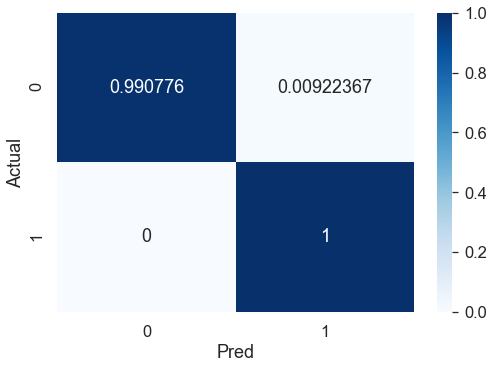

In [72]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat5 = pd.crosstab(
    index=y_train,      # filas    = valor real
    columns=pred_tr_2,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat5, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

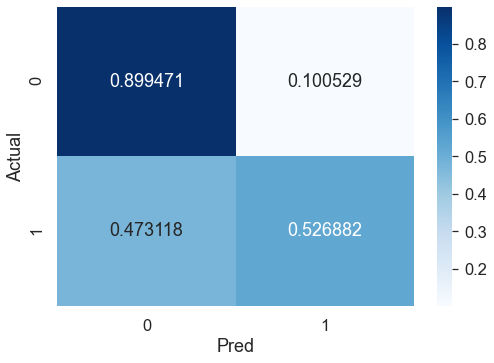

In [73]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat6 = pd.crosstab(
    index=y_test,       # filas    = valor real
    columns=pred_ts_2,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat6, annot=True, cmap='Blues', fmt='g')

Comparamos las metricas de los distintos puntos de corte

In [75]:
print("Threshold = 0.5")
display(df_metrics_05)

print()

print("Threshold = 0.15")
display(df_metrics_015)

print()

print("Threshold = 0.31")
display(df_metrics_031)

Threshold = 0.5


,train,test
accuracy,0.993498,0.871212
precision,0.991342,0.590909
recall,0.966245,0.279570
f1_score,0.978632,0.379562



Threshold = 0.15


,train,test
accuracy,0.959038,0.766667
precision,0.790000,0.355450
recall,1.000000,0.806452
f1_score,0.882682,0.493421



Threshold = 0.31


,train,test
accuracy,0.992198,0.846970
precision,0.951807,0.462264
recall,1.000000,0.526882
f1_score,0.975309,0.492462


In [77]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

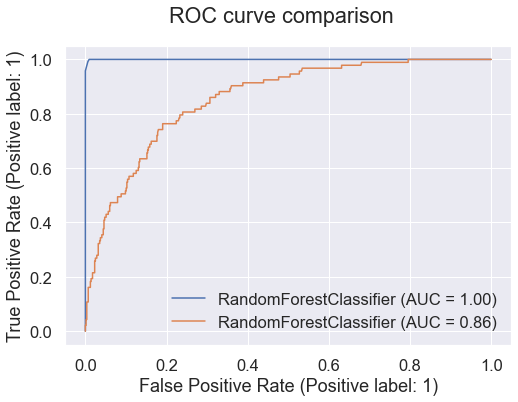

In [79]:
tr_disp = RocCurveDisplay.from_estimator(rf_model, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf_model, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Guardamos el modelo entrenado

In [81]:
import pickle

In [82]:
# Guardar en el disco
filename = 'models/rf_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

# Si queremos cargarlo, lo podemos hacer a partir del siguiente codigo:

```python
filename = 'models/rf_model.pkl'
rf_model = pickle.load(open(filename, 'rb'))
```